## KNN Implementation on scaled reduced dataset with t-SNE

In [31]:
# Utilities
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [32]:
seed = 23

In [33]:
df_scaled = pd.read_csv('../../Data/dataset_preprocessed.csv')

In [34]:
df_tsne = pd.read_csv('../../DimensionalityReductionData/t-SNE.csv')

In [35]:
df_scaled = df_scaled[['averageRating']]
df_scaled['Dim1'] = df_tsne['Dimension 1']
df_scaled['Dim2'] = df_tsne['Dimension 2']

In [36]:
df_scaled.head()

,averageRating,Dim1,Dim2
0,1,12.275841,-38.495010
1,0,-32.319275,-62.973427
2,1,-77.908150,-10.463196
3,0,-3.411618,-3.128705
4,0,0.957163,-16.427937


In [37]:
#df_scaled_sample = df_scaled.sample(n=1000, random_state=seed)
df_scaled_sample = df_scaled

In [38]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_sample.drop('averageRating', axis=1),
    df_scaled_sample['averageRating'], test_size=test_size,
    random_state=seed
)

In [39]:
X_train.head()

,Dim1,Dim2
10943,66.379326,4.496644
9472,-18.114365,-83.736595
5083,13.612900,-65.862560
4747,-41.036674,19.846966
6445,13.253739,-90.731840


In [40]:
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None, zero_division=0)),
    }

    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    # Print the classification report
    print("classification report")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], zero_division=0)
    print(report)

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()

    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()

    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])

    return df_metrics

In [41]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

print("F1 score:", f1_score(y_test, predictions, average=None))

Accuracy: 0.796469020652898
F1 score: [0.80245716 0.79010649]


In [42]:
param_grid = {
    'n_neighbors': [3, 7, 15],
    'p': [1, 2, 3, 4.3],
    'n_jobs': [-1, 1]
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The parameters with the highest score: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The parameters with the highest score:  {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}


In [43]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Show top 10 parameters for this model
minimalistic_results = cv_results_df[['params', 'mean_test_score']]
sorted_results = minimalistic_results.sort_values(by='mean_test_score', ascending=False)

print(sorted_results.head(10))

                                        params  mean_test_score
16     {'n_jobs': 1, 'n_neighbors': 7, 'p': 1}         0.800733
4     {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}         0.800733
5     {'n_jobs': -1, 'n_neighbors': 7, 'p': 2}         0.800567
17     {'n_jobs': 1, 'n_neighbors': 7, 'p': 2}         0.800567
6     {'n_jobs': -1, 'n_neighbors': 7, 'p': 3}         0.798817
18     {'n_jobs': 1, 'n_neighbors': 7, 'p': 3}         0.798817
7   {'n_jobs': -1, 'n_neighbors': 7, 'p': 4.3}         0.798234
19   {'n_jobs': 1, 'n_neighbors': 7, 'p': 4.3}         0.798234
22    {'n_jobs': 1, 'n_neighbors': 15, 'p': 3}         0.797734
10   {'n_jobs': -1, 'n_neighbors': 15, 'p': 3}         0.797734


Metrics for KNN-tSNE-GS-CV1:
Accuracy: 0.7975
Weighted F1: 0.7975
Weighted Precision: 0.7977
Weighted Recall: 0.7975
Macro-Averaged Precision: 0.7971
Macro-Averaged Recall: 0.7974
F1: [0.80475273 0.78961938]
Precision: [0.81100324 0.78311599]
classification report
              precision    recall  f1-score   support

     Class 0       0.81      0.80      0.80      1569
     Class 1       0.78      0.80      0.79      1433

    accuracy                           0.80      3002
   macro avg       0.80      0.80      0.80      3002
weighted avg       0.80      0.80      0.80      3002

Confusion Matrix


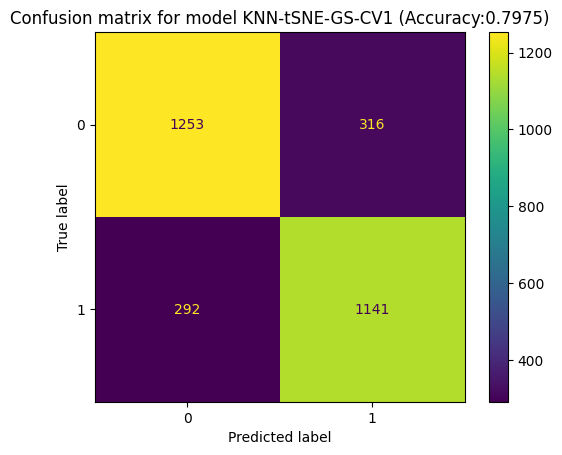

In [44]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
_ = calculate_metrics('KNN-tSNE-GS-CV1', y_test, predictions)

In [45]:
# Predicting using other alternatives of fine-tuning from top 10 performances
other_alternatives = []
# Choose a set of parameters from sorted_results
for i in range(10):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = KNeighborsClassifier(**params)
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  chosen_accuracy = accuracy_score(y_test, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)
  other_alternatives.append((chosen_accuracy,params))


Parameters from place:  0   {'n_jobs': 1, 'n_neighbors': 7, 'p': 1}
Accuracy for chosen parameters: 0.7974683544303798
Parameters from place:  1   {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}
Accuracy for chosen parameters: 0.7974683544303798
Parameters from place:  2   {'n_jobs': -1, 'n_neighbors': 7, 'p': 2}
Accuracy for chosen parameters: 0.7981345769487008
Parameters from place:  3   {'n_jobs': 1, 'n_neighbors': 7, 'p': 2}
Accuracy for chosen parameters: 0.7981345769487008
Parameters from place:  4   {'n_jobs': -1, 'n_neighbors': 7, 'p': 3}
Accuracy for chosen parameters: 0.7961359093937375
Parameters from place:  5   {'n_jobs': 1, 'n_neighbors': 7, 'p': 3}
Accuracy for chosen parameters: 0.7961359093937375
Parameters from place:  6   {'n_jobs': -1, 'n_neighbors': 7, 'p': 4.3}
Accuracy for chosen parameters: 0.7981345769487008
Parameters from place:  7   {'n_jobs': 1, 'n_neighbors': 7, 'p': 4.3}
Accuracy for chosen parameters: 0.7981345769487008
Parameters from place:  8   {'n_jobs': 1

In [46]:
# get best from top 10
best_tuple = max(other_alternatives, key=lambda x: x[0])

In [47]:
print("Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances")
print(best_tuple[0])
print(best_tuple[1])

Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances
0.7981345769487008
{'n_jobs': -1, 'n_neighbors': 7, 'p': 2}


In [48]:
# Run on training sample

# Choose a set of parameters from sorted_results
for i in range(10):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = KNeighborsClassifier(**params)
  model.fit(X_train, y_train)

  predictions = model.predict(X_train)

  chosen_accuracy = accuracy_score(y_train, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)

Parameters from place:  0   {'n_jobs': 1, 'n_neighbors': 7, 'p': 1}
Accuracy for chosen parameters: 0.8430523158947018
Parameters from place:  1   {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}
Accuracy for chosen parameters: 0.8430523158947018
Parameters from place:  2   {'n_jobs': -1, 'n_neighbors': 7, 'p': 2}
Accuracy for chosen parameters: 0.8417194268577141
Parameters from place:  3   {'n_jobs': 1, 'n_neighbors': 7, 'p': 2}
Accuracy for chosen parameters: 0.8417194268577141
Parameters from place:  4   {'n_jobs': -1, 'n_neighbors': 7, 'p': 3}
Accuracy for chosen parameters: 0.8413028990336554
Parameters from place:  5   {'n_jobs': 1, 'n_neighbors': 7, 'p': 3}
Accuracy for chosen parameters: 0.8413028990336554
Parameters from place:  6   {'n_jobs': -1, 'n_neighbors': 7, 'p': 4.3}
Accuracy for chosen parameters: 0.8416361212929023
Parameters from place:  7   {'n_jobs': 1, 'n_neighbors': 7, 'p': 4.3}
Accuracy for chosen parameters: 0.8416361212929023
Parameters from place:  8   {'n_jobs': 1

In [49]:
best_accuracy = 0
best_report = None
best_predictions = None
y_best_predictions = None
all_reports = []

for i in range(100):
  random_state_fit = np.random.randint(1000)

  test_size = 0.2
  X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_sample.drop('averageRating', axis=1),
    df_scaled_sample['averageRating'], test_size=test_size,
    random_state=random_state_fit)


  model = KNeighborsClassifier(**best_tuple[1])
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  current_accuracy = accuracy_score(y_test, predictions)

  report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
  all_reports.append(report)
  print(current_accuracy)

  if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_report = report
        best_predictions = predictions
        y_best_predictions = y_test

def average_classification_report(reports):
    metrics = ['precision', 'recall', 'f1-score']
    avg_report = {}
    for metric in metrics:
        avg_report[metric] = sum(r['macro avg'][metric] for r in reports) / len(reports)
    avg_report['accuracy'] = sum(r['accuracy'] for r in reports) / len(reports)
    return avg_report

avg_report = average_classification_report(all_reports)

print("Best Classification Report:")
print(classification_report(y_best_predictions, best_predictions, zero_division=0))
print("Best Accuracy:", best_accuracy)
print()
print("Average Classification Report:")
for metric, score in avg_report.items():
    print(f"{metric}: {score:.4f}")

0.7994670219853431
0.7911392405063291
0.7994670219853431
0.7974683544303798
0.8027981345769487
0.7981345769487008
0.7911392405063291
0.7971352431712192
0.8014656895403065
0.7994670219853431
0.8027981345769487
0.7944703530979347
0.7991339107261826
0.7981345769487008
0.8087941372418388
0.7944703530979347
0.7901399067288475
0.7948034643570953
0.7948034643570953
0.8037974683544303
0.7871419053964024
0.8044636908727515
0.8061292471685543
0.8031312458361093
0.7981345769487008
0.8117921385742838
0.8041305796135909
0.7968021319120586
0.8011325782811459
0.8027981345769487
0.796469020652898
0.8007994670219853
0.8084610259826782
0.793471019320453
0.7978014656895404
0.8014656895403065
0.796469020652898
0.7868087941372418
0.7871419053964024
0.8041305796135909
0.7978014656895404
0.7911392405063291
0.7978014656895404
0.7961359093937375
0.8027981345769487
0.8067954696868754
0.7971352431712192
0.7974683544303798
0.7911392405063291
0.8024650233177881
0.8014656895403065
0.8094603597601598
0.7938041305796

Metrics for KNN-tSNE-Shuffled_best:
Accuracy: 0.8125
Weighted F1: 0.8125
Weighted Precision: 0.8127
Weighted Recall: 0.8125
Macro-Averaged Precision: 0.8124
Macro-Averaged Recall: 0.8126
F1: [0.81547034 0.80934643]
Precision: [0.82384106 0.80093834]
classification report
              precision    recall  f1-score   support

     Class 0       0.82      0.81      0.82      1541
     Class 1       0.80      0.82      0.81      1461

    accuracy                           0.81      3002
   macro avg       0.81      0.81      0.81      3002
weighted avg       0.81      0.81      0.81      3002

Confusion Matrix


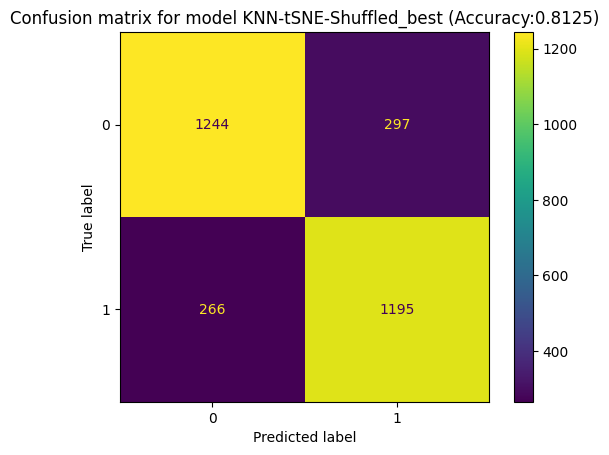

,Accuracy,Weighted F1,Weighted Precision,Weighted Recall,Macro-Averaged Precision,Macro-Averaged Recall,F1,Precision
KNN-tSNE-Shuffled_best,0.812458,0.81249,0.812695,0.812458,0.81239,0.8126,[0.81547034 0.80934643],[0.82384106 0.80093834]


In [51]:
calculate_metrics('KNN-tSNE-Shuffled_best', y_best_predictions, best_predictions)